In [14]:
%matplotlib notebook  
import pickle 
from collections import defaultdict
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import torch 
from psvi.experiments.experiments_utils import make_four_class_dataset


def rec_dd():
    return defaultdict(rec_dd)

num_trials=10

In [2]:
%%capture
! \
python3 ../experiments/flow_psvi.py \
--architecture logistic_regression \
--coreset_sizes 20 \
--num_epochs 1401 \
--inner_it 50 \
--log_every 20 \
--lr0u 1e-3 \
--lr0v 1e-2 \
--lr0net 1e-4 \
--datasets synth_lr_10 synth_lr_50 synth_lr_200 \
--methods psvi_alpha_v \
--num_trials "$num_trials" \
--init_at subsample \
--init_sd 1e-3 \
--data_minibatch 128 \
--fnm is_vs_dim 

In [32]:
with open('../results/is_vs_dim.pk', 'rb') as f:
       results = pickle.load(f)

<IPython.core.display.Javascript object>


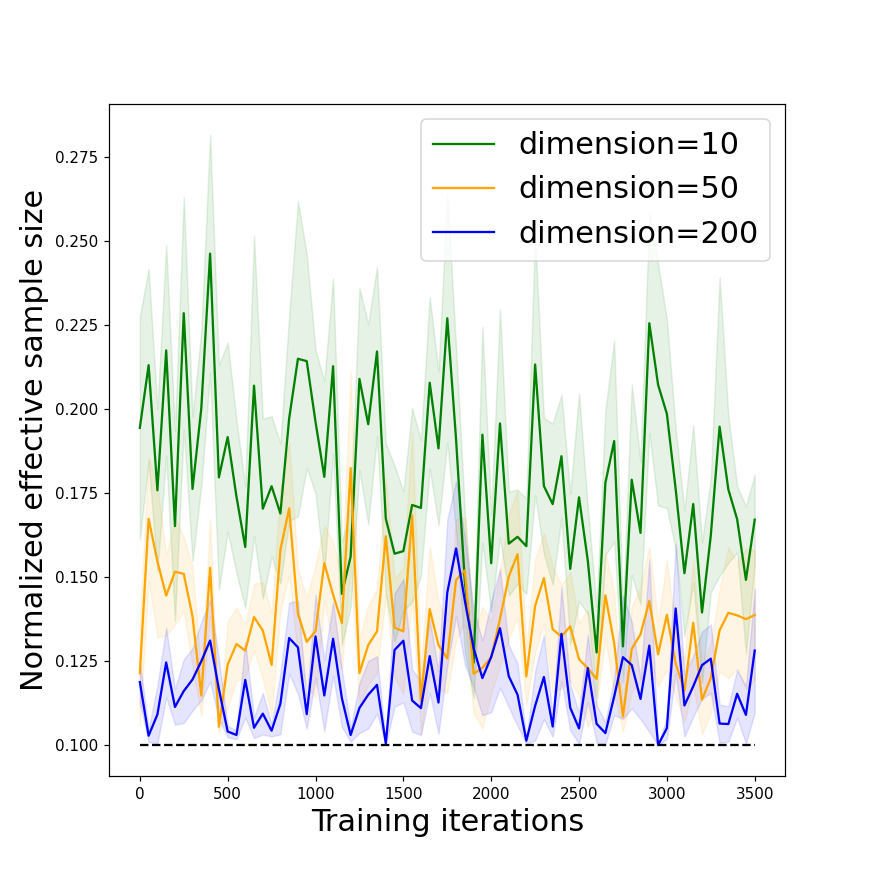

In [33]:
colors_lst = ['green', 'orange', 'blue']
def plot_is_vs_dims_analysis(ax=None, fnm=None):
    if ax is None:
        f, ax = plt.subplots(1, 1, figsize=(8, 8))
    datasets = list(results.keys())
    metrics_array = [None]*len(datasets)
    for i, dnm in enumerate(datasets):
        trials = results[dnm]['psvi_alpha_v'][20].keys()
        metrics_array[i] = np.asarray([results[dnm]['psvi_alpha_v'][20][tr]['ness'] for tr in trials])
        x_vals =[50*j for j in range(len(metrics_array[i][0]))]
        means, stds = np.mean(metrics_array[i], axis=0), np.std(metrics_array[i], axis=0)
        ax.plot(x_vals, means, color=colors_lst[i], label=f"dimension={dnm.split('_')[-1]}")
        ax.fill_between(x_vals, means-stds/np.sqrt(num_trials), means + stds/np.sqrt(num_trials), color=colors_lst[i], alpha=0.1)
        ax.legend(**{"fontsize": 20})
    ax.plot(x_vals, [0.1]*len(x_vals), color='k', linestyle="dashed")
    ax.set_xlabel("Training iterations", fontdict={"fontsize": 20})
    ax.set_ylabel("Normalized effective sample size", fontdict={"fontsize": 20})
    plt.show()
    f.savefig(fnm + ".png",
    format="png",
    bbox_inches="tight",
)
    
plot_is_vs_dims_analysis(fnm='figs/is-vs-dim')